In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the data from the CSV file
df = pd.read_csv("Resources/card_transdata.csv")

In [3]:
# Select numerical columns for clustering
features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
X = df[features]

In [4]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
def plot_elbow_method(data):
  """
  This function plots the elbow method to determine the optimal number of clusters.
  """
  wcss = []  # Within-cluster sum of squares
  for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
  plt.figure(figsize=(8, 6))
  plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
  plt.xlabel("Number of clusters")
  plt.ylabel("WCSS")
  plt.title("Elbow Method for K-Means Clustering")
  plt.grid(True)
  plt.show()

D:\Newfolder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Newfolder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Newfolder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Newfolder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Newfolder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

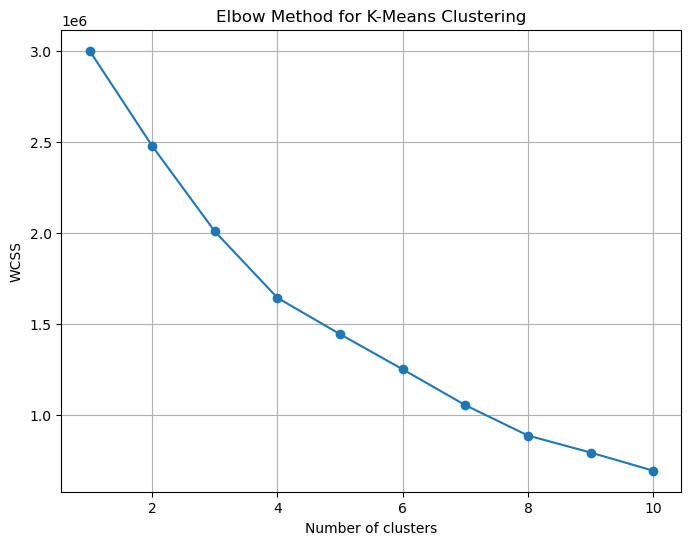

In [6]:
# Find the optimal number of clusters using the elbow method
plot_elbow_method(X_scaled)

In [7]:
# Choose the number of clusters based on the elbow method 
n_clusters = 2

# Create K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(X_scaled)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

D:\Newfolder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Clusters by distance_from_home and distance_from_last_transaction')

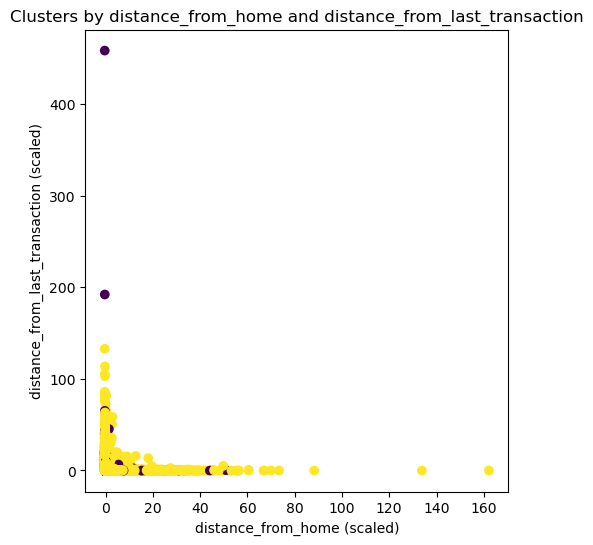

In [8]:
plt.figure(figsize=(12, 6))  # Increase figure size for better readability

# Scatter plot for distance_from_home vs. distance_from_last_transaction
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['cluster'], cmap='viridis')  # Use a colormap like viridis for better contrast
plt.xlabel('distance_from_home (scaled)')  # Indicate scaled data
plt.ylabel('distance_from_last_transaction (scaled)')
plt.title('Clusters by distance_from_home and distance_from_last_transaction')


D:\Newfolder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


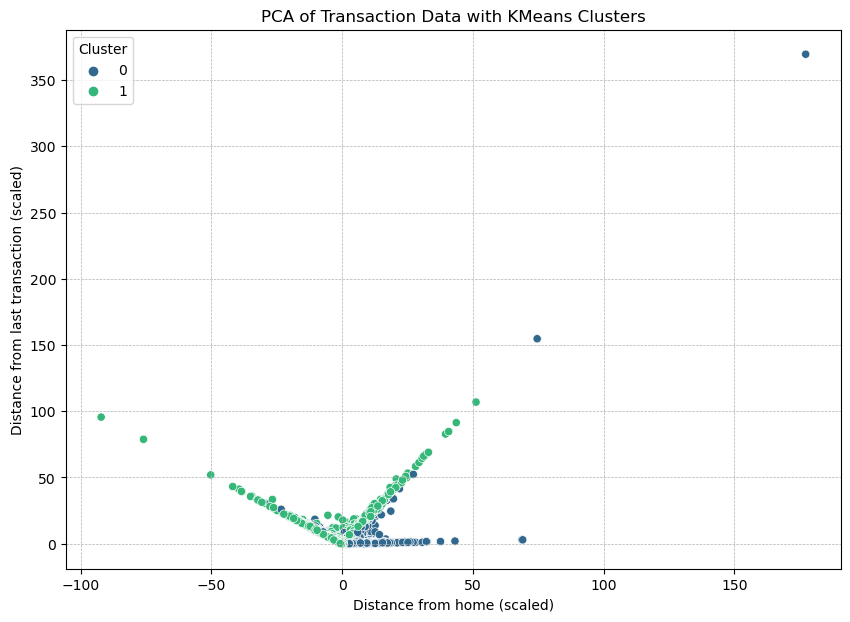

In [14]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
# Choose the number of clusters based on the elbow method 
n_clusters = 2

# Create K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(X_scaled)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

#consistent cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['cluster']

# Plot the PCA results colored by cluster


plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', marker='o')  # Emphasize cluster separation with viridis
plt.title('PCA of Transaction Data with KMeans Clusters')
plt.xlabel('Distance from home (scaled)')
plt.ylabel('Distance from last transaction (scaled)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add gridlines
plt.legend(title='Cluster', loc='upper left')  # Adjust legend title 
plt.show()